In [1]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Data
import numpy as np
import pandas as pd

#Charts and visulaization
import matplotlib as mp
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
import plotly.graph_objects as go

#NNs
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [4]:
import glob
import pandas as pd

# Set the path to the folder containing the CSV files
data = r"C:\Users\Salvador\OneDrive - FCT NOVA\01- Documents\Dissertação\(R) ML_Model\Job_table_info_V2\Job_info1.xls"
data = pd.read_excel(data)

In [5]:
data.head

<bound method NDFrame.head of                jobno                                           custname  \
0      HAISID2300014    GRUPO DESPORTIVO RECREATIVO E CULTURAL PRETORIA   
1       JNBIL2301115                 SPEEDLINK PROJECTS & TRADE PVT LTD   
2      HSEPDL2300228  SEGMA SERVICOS DE ENGENHARIA, GESTAO E MANUTEN...   
3      HSEPDL2300226  ISLAND IMPORT - IMPORTACAO DE PRODUTOS ALIMENT...   
4      HSEPDL2300227  SEGMA SERVICOS DE ENGENHARIA, GESTAO E MANUTEN...   
...              ...                                                ...   
49995  HSELIS2218499              CEP II-CORREOS EXPRESS PORTUGAL, S.A.   
49996  HSELIS2218172              CEP II-CORREOS EXPRESS PORTUGAL, S.A.   
49997   AELIS2214432              CEP II-CORREOS EXPRESS PORTUGAL, S.A.   
49998   AELIS2214179              CEP II-CORREOS EXPRESS PORTUGAL, S.A.   
49999   AELIS2214254              CEP II-CORREOS EXPRESS PORTUGAL, S.A.   

          jobdate biztype  departure_loc              destino      fr

#### [Não funciona ao primeiro RUN]

In [6]:
# Assuring jobdate is in datetime format
data['jobdate'] = pd.to_datetime(data['jobdate'])


C:\Users\Salvador\Documents\Coding\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2203' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Salvador\Documents\Coding\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/03/2025' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Salvador\Documents\Coding\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/07/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Salvador\Documents\Coding\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: User

In [7]:
data['jobdate'] = pd.to_datetime(data['jobdate'])


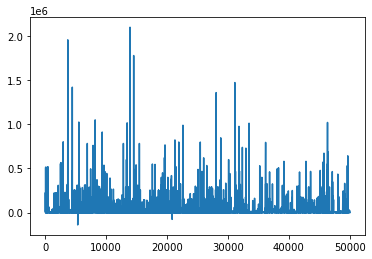

In [9]:
# Convert the date column to the appropriate date format
data['jobdate'] = pd.to_datetime(data['jobdate'])

# Extract the month from the date column
data['Year'] = data['jobdate'].dt.year
data['Month'] = data['jobdate'].dt.month

# Ensure that the freight cost column is in numeric format
data['frete'] = pd.to_numeric(data['frete'])

#plot frete

plt.plot(data['frete'])

In [10]:
print(data.columns)

Index(['jobno', 'custname', 'jobdate', 'biztype', 'departure_loc', 'destino',
       'frete', 'incoterm', 'total_volume_cbm', 'ownerid', 'servicetype',
       'bizscope', 'ctnqty1', 'ctnqty2', 'ctnqty3', 'ctnqty4', 'polname',
       'podname', 'Year', 'Month'],
      dtype='object')


In [16]:
# Create a DataFrame with all possible combinations of Year and Month
all_months = pd.DataFrame(index=pd.MultiIndex.from_product([data['Year'].unique(), range(1, 13)], names=['Year', 'Month']))

# Group your data by Year and Month
grouped_data = data.groupby(['Year', 'Month'])

# Perform the desired aggregations on your grouped data
aggregated_data = grouped_data.agg({'frete': 'sum', 'jobno': 'size'})

# Reindex the aggregated data to include all months and convert the Month column to the desired representation
aggregated_data = aggregated_data.reindex(all_months.index, fill_value=0)
aggregated_data.reset_index(inplace=True)
aggregated_data['Month'] = ((aggregated_data['Year'] - aggregated_data['Year'].min()) * 12) + aggregated_data['Month']
aggregated_data = aggregated_data[aggregated_data['Year'] <= 2025]

# Sort the data by the new representation of Month
aggregated_data.sort_values('Month', inplace=True)

# Reset the index to have a sequential order
aggregated_data.reset_index(drop=True, inplace=True)

# Rename the columns
aggregated_data.rename(columns={'frete': 'Total_Frete', 'jobno': 'Total_Jobs'}, inplace=True)


aggregated_data

,Year,Month,Total_Frete,Total_Jobs
0,2022,1,0.00,0
1,2022,2,0.00,0
2,2022,3,0.00,0
3,2022,4,0.00,0
4,2022,5,0.00,0
5,2022,6,0.00,0
6,2022,7,0.00,0
7,2022,8,0.00,0
8,2022,9,0.00,0
9,2022,10,0.00,0


In [18]:
data_array = aggregated_data.array()

AttributeError: 'DataFrame' object has no attribute 'array'

##### dados para todos os meses

In [ ]:
plt.plot(monthly_costs['frete'])

## Outlier detection


In [ ]:
plt.boxplot(data['frete'])
plt.show()

In [ ]:
from scipy.stats import zscore

# Calculate z-scores for a column
z_scores = zscore(data['frete'])

# Identify outliers based on a threshold
outlier_threshold = 3
outliers = data[abs(z_scores) > outlier_threshold]

print(outliers)
#create a list with outliers


### FALTA Remover outliers 

## Tragets and Inputs Variables


In [ ]:
import pandas as pd

# Input features (X)
X = aggregated_data[['Month', 'Year', 'jobno']] 

# Target variable (y)
y = aggregated_data['frete']

X.shape

## Train-Test Split (scikit-learn library)

#### Questão: features e timestep?

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #42 assures the same split everytime

#Xtrain tem dim=2; ytrain tem dim=1
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

## Definir e treinar o modelo RNN 

In [ ]:
#Definir variáveis a mudar
timesteps = None
features = 4
units_RNN = 32

num_epochs = 10
batch_size = 32

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()

model.add(LSTM(units=units_RNN, input_shape=(timesteps, features), return_sequences=True)) #n sabemos quantos meses vai receber
#returnsequences faz reparar na sequencia

model.add(LSTM(units=units_RNN))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')
model.summary()


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_test, y_test))    

In [ ]:
loss = model.evaluate(X_test, y_test)